###Heart disease diagnosis:

Problem statement

Chloe is  hypochondriac. She has an intense fearof having a serious condition and worriesthat minor symptoms will indicate something serious.Her parents are really worried about herand decided to consult Dr. Will for the same. Dr.Will is a psychiatrist. Help Dr. Will to diagnoseChloe. Dr. Will needs to first determine if Chloeis really suffering from any heart andcardiovascular disease  as she  complains. Furtherthe doctor needs to check if the patient isdiabetic. Help Dr. Will to perform these three diagnosesso that we can help him save Chloe.

Loading Libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the csv file

In [150]:
df = pd.read_csv('heart.csv')

In [151]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Examining the Data set


In [152]:
df.shape

(303, 14)

In [153]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [154]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [155]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [156]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Correlation among the attributes

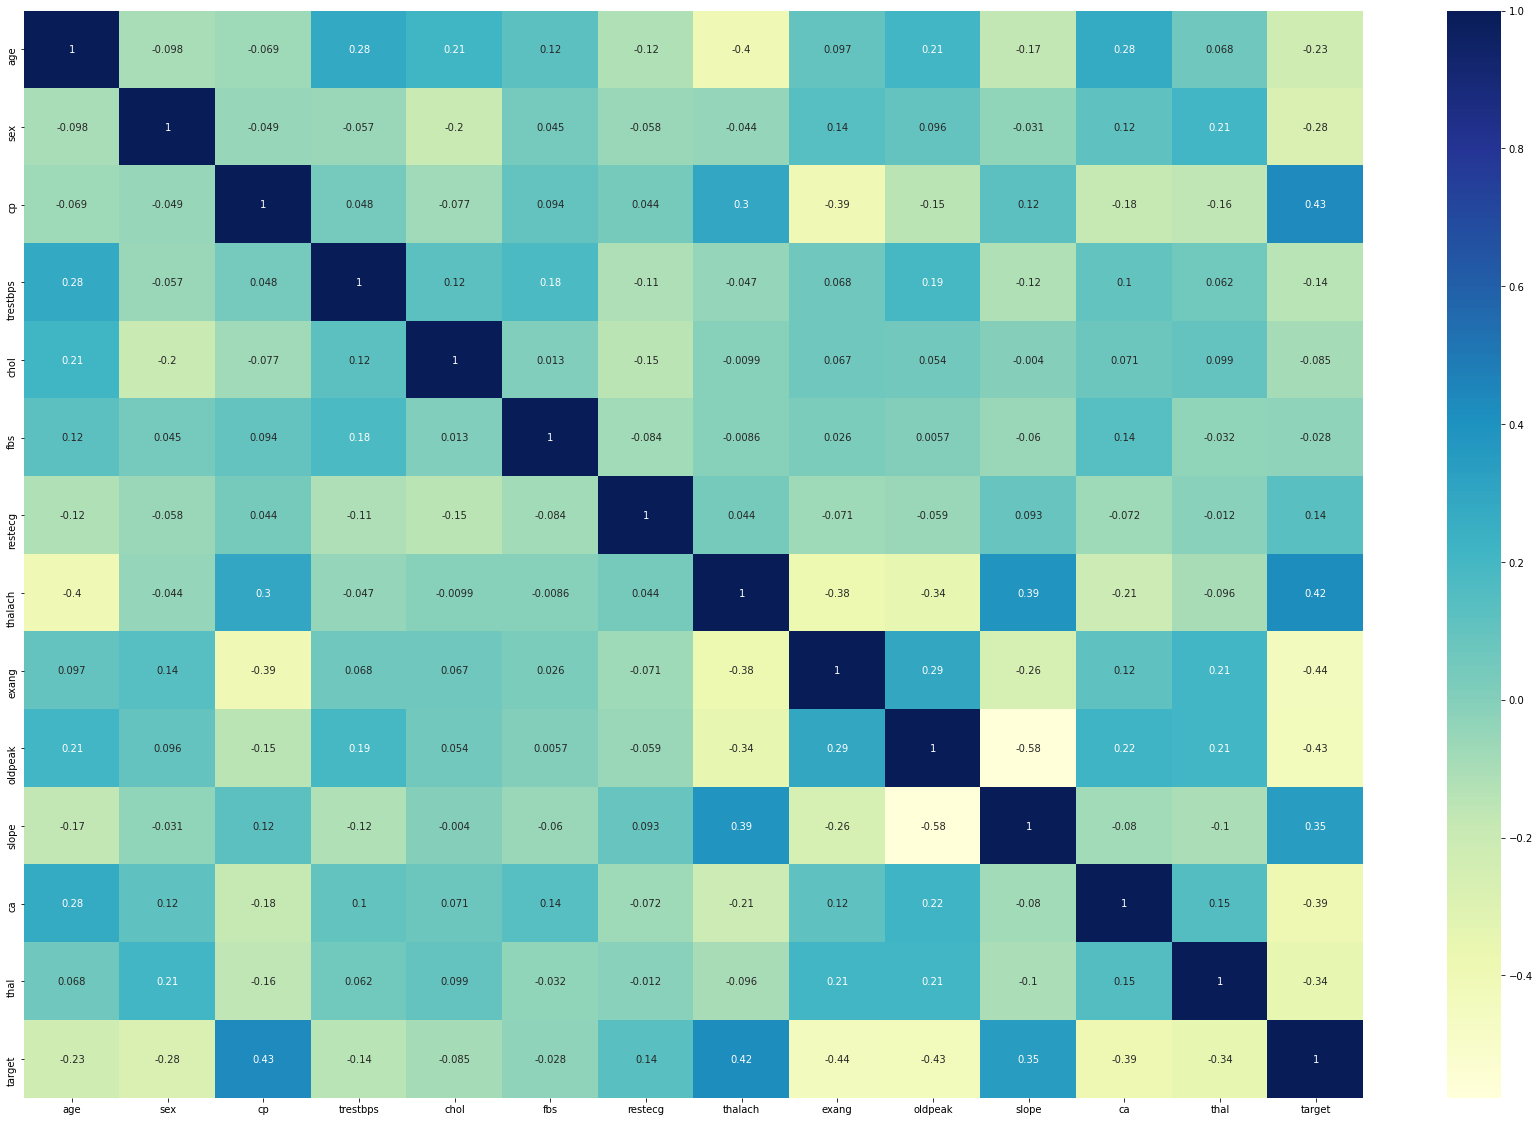

In [157]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

Here, We observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

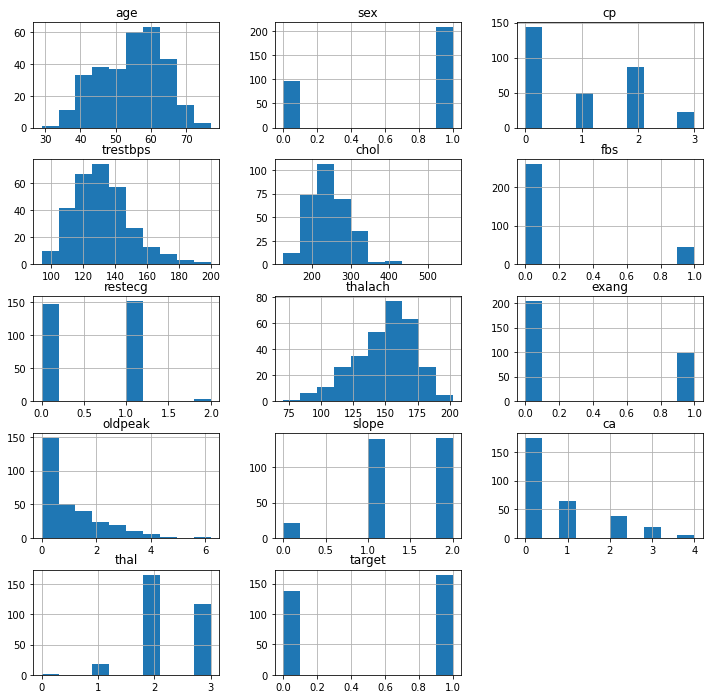

In [158]:
df.hist(figsize=(12,12), layout=(5,3));

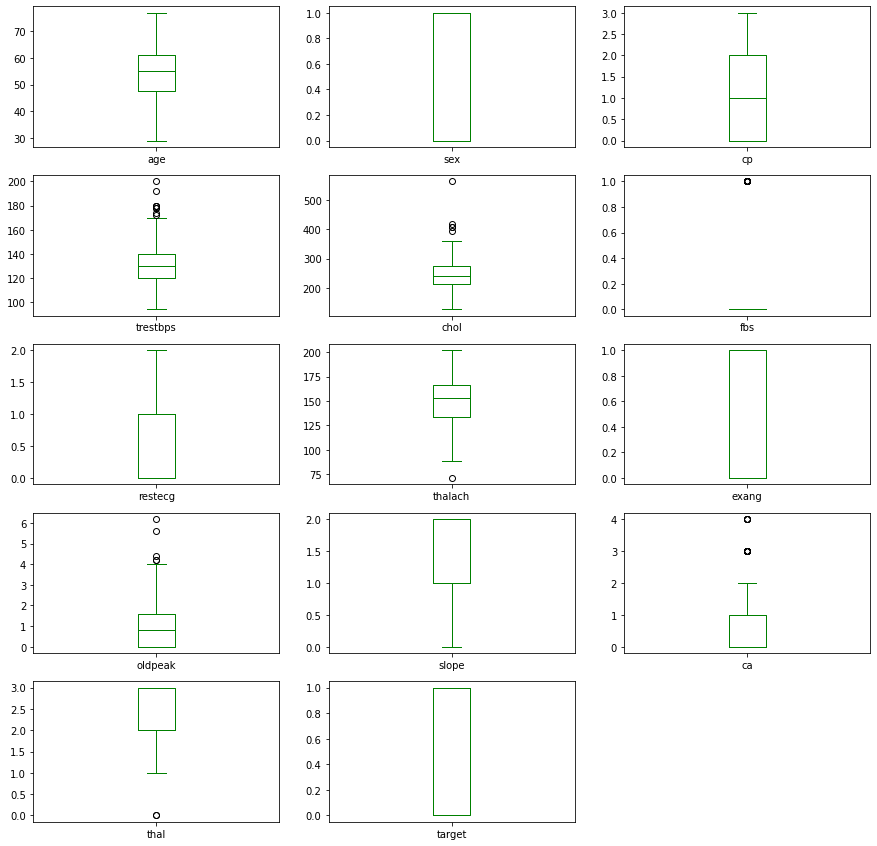

In [159]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(15,15),color = 'green')
plt.show()

In [160]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [161]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

This means, there are 207 males and 96 females and 165 cases of heart diseases
and 138 cases of no heart diseases

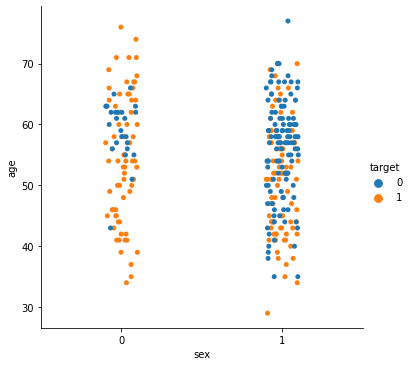

In [162]:
sns.catplot(data=df, x='sex', y='age', hue='target', palette='tab10')

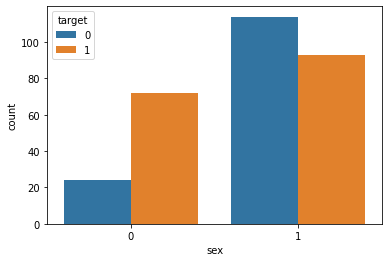

In [163]:
sns.countplot(x='sex', data=df, palette='tab10', hue='target')

Here, 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

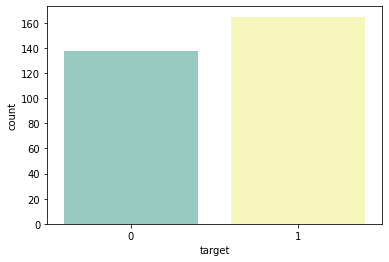

In [164]:
sns.countplot(x='target',palette='Set3', data=df)

Here, We observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 140 and those having heart disease the count is 160.

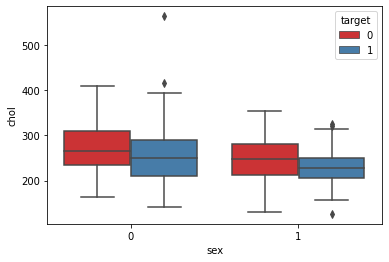

In [165]:
sns.boxplot(x='sex', y='chol', hue='target', palette='Set1', data=df)

Here,We observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set.

Preparation of data for Model

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [167]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [169]:
X= df.drop(['target'], axis=1)
y= df['target']

In [170]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

Sample Size Check

In [171]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


Training with Different Models


Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [173]:
cm2

array([[33,  7],
       [12, 39]])

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction2)


0.7912087912087912

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.73      0.82      0.78        40
           1       0.85      0.76      0.80        51

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [177]:
cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]])

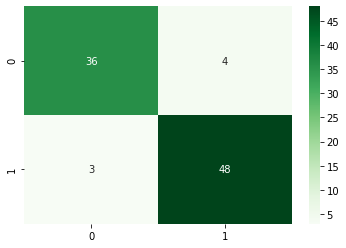

In [178]:
sns.heatmap(cm, annot=True,cmap='Greens')

In [179]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[34,  6],
       [ 4, 47]])

In [183]:
accuracy_score(y_test, prediction3)


0.8901098901098901

In [184]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.89      0.92      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



SVC

In [185]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[33,  7],
       [ 2, 49]])

In [186]:
accuracy_score(y_test, prediction4)

0.9010989010989011

Predicting for the given data

In [187]:
data= {'age' : 25, 'sex' : 0, 'cp': 1, 'trestbps' : 110, 'chol' : 162, 'fbs' : 0, 'restecg': 0, 'thalach' : 150, 'exang' : 1, 'oldpeak' : 0.8, 'ca' : 0, 'slope' : 1, 'thal' : 1 }

In [188]:
df1=pd.DataFrame(data, index=[0])

In [189]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,slope,thal
0,25,0,1,110,162,0,0,150,1,0.8,0,1,1


Preidicting Outcome for the given, using different models

In [190]:
result=model1.predict(df1)
print(result)

[1]


In [191]:
result=model2.predict(df1)
print(result)

[1]


In [192]:
result=model3.predict(df1)
print(result)

[0]


In [193]:
result=model4.predict(df1)
print(result)

[1]


Out of the 4, Logistic Regression has highest Accuracy. So
the Outcome using it is : 

In [194]:
Predicted_Result=model1.predict(df1)
print(Predicted_Result)

[1]


In [195]:
if Predicted_Result:
    print("This Patient is likely to have a Heart Disease")
else:
    print("This Patient is not likely to have a Heart Disease")

This Patient is likely to have a Heart Disease
